# [Lab Session 2](otsu.ipynb)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

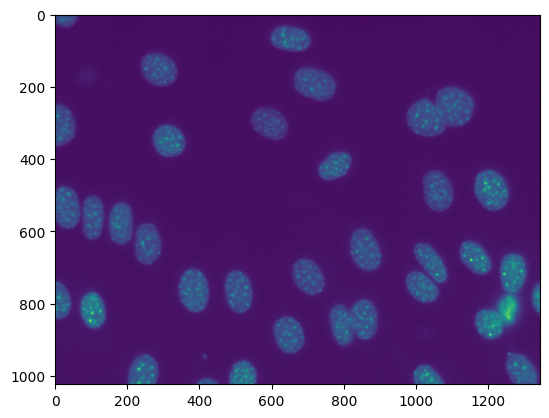

In [11]:
imgf = plt.imread('data/NIH3T3/im/dna-0.png')
plt.imshow(imgf)

**[Task 1.2.]()** Quantify the image into 256 bins:

In [12]:
img8 = (imgf * 255).round().astype(np.uint8)

**[Task 1.3.]()** Compute the image histogram:

In [13]:
def compute_histogram(img8):
    h = np.zeros(256, dtype=int) #erstmal ein leerer Array, in den die Intensitätswerte hinein sollen
    for i in range(256): #es geht um die Intensitätswerte i über das gesamte Bild, das 256 Werte beinhaltet
        h[i] = np.sum(img8 == i) #aufsummieren der Intensitätswerte und speichern im Index vom h, das ihren jeweiligen Intensität wiedergibt
    return(h)
#berechnen des Hist
h = compute_histogram(img8)

Show the computed histogram:

<BarContainer object of 256 artists>

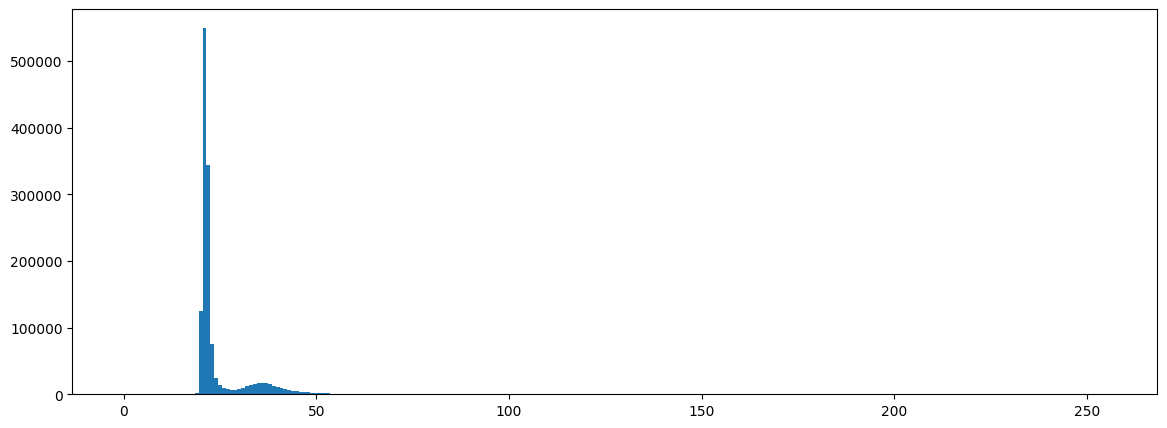

In [14]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

In [ ]:
#Leerer Array, in dem der T mit min gespeichert wird
minimal_T = np.array(0)
#Anzahl aller Pixel
total_pixels = np.sum(h)
# Hilfsvariablen für die Berechnung
T_values = range(1, 256)  # Schwellenwerte von 1 bis 255
min_within_class_variance = float("inf")  # Minimaler Wert

for T in T_values:
    # Klasse 1: Bereich [0, T-1]
    n1 = np.sum(h[0:T])  # Anzahl Pixel in Klasse 1
    if n1 == 0:  # Keine Pixel in Klasse 1
        continue
    mean1 = np.sum([i * h[i] for i in range(T)]) / n1  # Mittelwert Klasse 1
    var1 = np.var([i for i in range(T) for _ in range(h[i])])  # Varianz Klasse 1

    # Klasse 2: Bereich [T, 255]
    n2 = total_pixels - n1  # Anzahl Pixel in Klasse 2
    if n2 == 0:  # Keine Pixel in Klasse 2
        continue
    mean2 = np.sum([i * h[i] for i in range(T, 256)]) / n2  # Mittelwert Klasse 2
    var2 = np.var([i for i in range(T, 256) for _ in range(h[i])])  # Varianz Klasse 2

    # Gewichtete Varianz innerhalb der Klassen
    within_class_variance = n1 * var1 + n2 * var2

    # Prüfen, ob dies die minimalste Varianz ist
    if within_class_variance < min_within_class_variance:
        min_within_class_variance = within_class_variance
        optimal_T = T

print(f"Optimaler Schwellenwert T: {optimal_T}")




Optimaler Schwellenwert T: 31


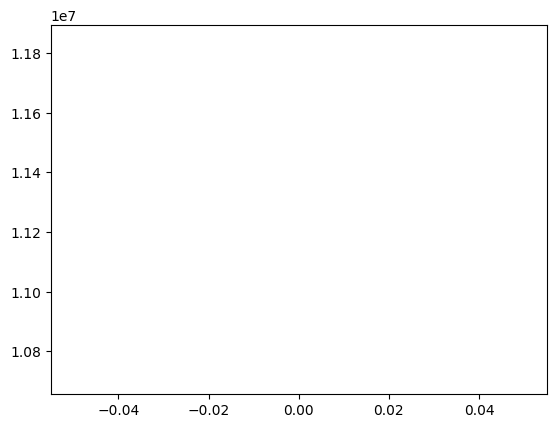

In [ ]:
#hier noch ein plot -- siehe Bild
plt.plot(. . . ) # falsch

**[Task 1.5.]()** Perform Otsu thresholding:

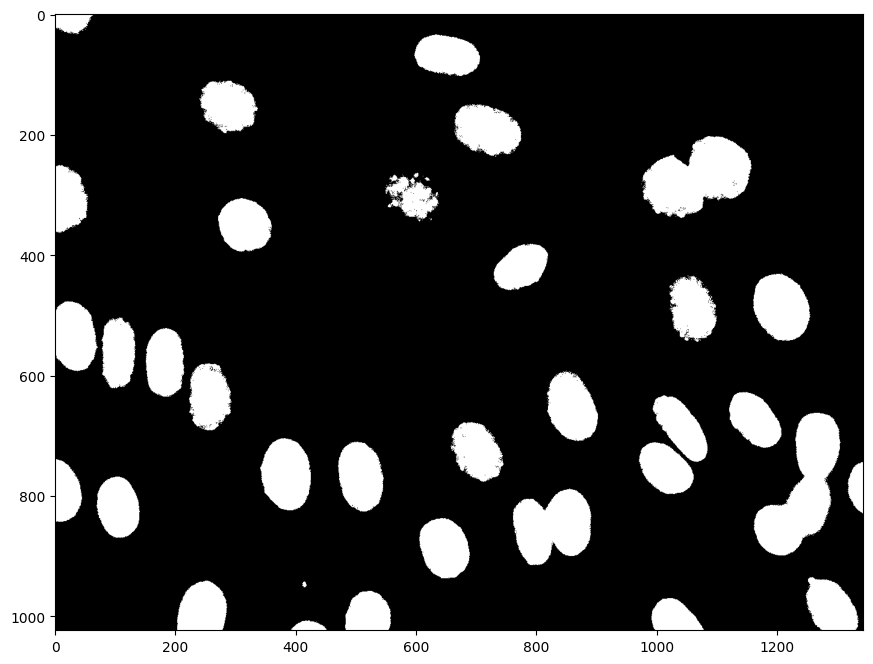

In [16]:
seg_o = img8 >= optimal_T #erzeugt eine True/False Array davon abhängig ob die die Werte von img8 über den T liegen oder nicht 
plt.figure(figsize=(15,8))
plt.imshow(seg_o, cmap='gray', vmin=0, vmax=1)
#print(img8)

**[Task 1.6.]()** Compute the Dice coefficient:

In [17]:
#Lsg ist 0,894378.....
ground_truth = plt.imread('data/NIH3T3/gt/0.png')
G = seg_o.sum()
H = ground_truth.sum()
X4 = seg_o * ground_truth
J = X4.sum()
Dice = (2 * J)/(G + H)
print(Dice)

0.8943783223933183
